# CONFIDENCE INTERVALS

**EXERCISE 1.** What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. Give a 99% confidence interval for the average body temperature of healthy people.



In [1]:
import numpy as np
from scipy import stats

In [2]:
n = 130
sigma = 0.73
sem = sigma / np.sqrt(n)
sem

0.06402523540941313

In [4]:
confidence_int = stats.norm.interval(confidence=0.99, loc = 98.25, scale = sem)
confidence_int

(98.08508192246582, 98.41491807753418)

In [5]:
print(f"Given a 99% confidence interval, normal body temperature for healthy humans is between {confidence_int[0]} and {confidence_int[1]} limits.")

Given a 99% confidence interval, normal body temperature for healthy humans is between 98.08508192246582 and 98.41491807753418 limits.


**EXERCISE 2.** 

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively. Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.



In [6]:
n = 500
sigma = 3.1
sem = sigma / np.sqrt(n)
sem

0.13863621460498696

In [7]:
confidence_int = stats.norm.interval(confidence = 0.95, loc = 5.4, scale = sem)
confidence_int

(5.12827801242126, 5.67172198757874)

In [8]:
print(f"Given a 95% confidence interval, average length of stay for the population of patients which the sample drawn is between {confidence_int[0]} and {confidence_int[1]} limits.")

Given a 95% confidence interval, average length of stay for the population of patients which the sample drawn is between 5.12827801242126 and 5.67172198757874 limits.


# HYPOTHESIS TESTING

**EXERCISE 3.** 

The hourly wages in a particular industry are normally distributed with mean 13.20 Dollars and standard deviation 2.50 Dollars. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18) CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826



In [9]:
n = 40
xbar = 12.20
sigma = 2.50
mu = 13.20
alpha = 0.01

In [10]:
# 2. calculate the test statistic

z = (xbar-mu)/(sigma/np.sqrt(n))  
z

-2.5298221281347035

In [11]:
p = stats.norm.cdf(-2.5298221281347035)
p

0.005706018193000826

In [13]:
if p < alpha:
    print('At {} level of significance, we reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we reject the null hypothesis in favor of alternative hypothesis.


**EXERCISE 4.**

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level? Results for two type of soils https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit#gid=0 CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06



In [15]:
soil_1 = np.array([1.442,1.943,1.11,1.912,1.553,1.641,1.499,1.347,1.685,1.578,1.866,1.653,
                  1.665,1.64,1.976,1.754,1.589,1.976,1.863,1.932,1.57,1.613,2.054,1.55,1.714,1.896,
                  1.737,1.74,1.708,1.548])

soil_2 = np.array([1.364,1.878,1.337,1.828,1.371,1.428,1.119,1.373,1.589,1.714,1.26,1.492,1.395,1.778,1.611,1.202,
                  1.542,1.094,1.557,1.053,1.183,1.367,1.144,1.151,1.561,1.192,1.489,1.379,1.501,1.277,1.593,1.172,
                  1.51,1.74,1.355])


In [17]:
stats.ttest_ind_from_stats(mean1 = np.mean(soil_1), 
                           std1 = np.std(soil_1, ddof=1), 
                           nobs1 = np.size(soil_1),
                           mean2 = np.mean(soil_2), 
                           std2 = np.std(soil_2, ddof=1),      
                           nobs2 = np.size(soil_2))

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [18]:
crit_test = stats.ttest_ind(soil_1, soil_2, equal_var=True, alternative='two-sided')
crit_test

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [19]:
p = crit_test[1]
alpha = 1

In [20]:
# result
if p < alpha:
    print('At {} level of significance, we reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 1 level of significance, we reject the null hypothesis in favor of alternative hypothesis.


**EXERCISE 5.** 

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC). Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots. CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")

In [23]:
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


# Descriptive statistics

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [25]:
df.shape

(70, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [27]:
df.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [28]:
df[df.Continent_Code.isnull()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [29]:
df.loc[8,"Continent_Code"] = "NA"

In [30]:
df.loc[68,"Continent_Code"] = "NA"

In [31]:
df.loc[45,"Continent_Code"] = "SA"

In [32]:
df.loc[18,"Continent_Code"] = "NA"

In [33]:
df.loc[13,"Continent_Code"] = "NA"

In [34]:
df.isnull().sum()

Country Code              0
Continent_Code            0
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [35]:
df.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          NA  \
internet_users_per_100 count    2.000000   17.000000   37.000000    4.000000   
                       mean    43.359918   68.455613   77.274888   69.250730   
                       std      7.297226   21.086060   12.425773   15.422659   
                       min     38.200000   21.976068   53.744979   54.215766   
                       25%     40.779959   50.300000   68.632900   58.376154   
                       50%     43.359918   74.000000   76.184000   67.158576   
                       75%     45.939877   84.948353   87.479056   78.033152   
                       max     48.519836   92.884826   98.200000   88.470000   
Math                   count    2.000000   17.000000   37.000000    4.000000   
                       mean   363.212100  466.216647  477.981449  428.307825   
                       std      5.099513   64.356490   35.150403   82.146581   
                       min    359.606200  380.259000  371.311400  327.702000   
                       25%    361.409150  403.833200  464.040100  382.115550   
                       50%    363.212100  459.816000  489.728700  434.940950   
                       75%    365.015050  531.296100  503.722000  481.133225   
                       max    366.818000  564.189700  521.250600  515.647400   
Reading                count    2.000000   17.000000   37.000000    4.000000   
                       mean   355.457400  454.059682  476.164608  452.207025   
                       std      7.916909   57.048962   37.720545   75.455320   
                       min    349.859300  346.549000  351.741500  357.737700   
                       25%    352.658350  408.102200  452.514300  410.050050   
                       50%    355.457400  433.542300  487.250100  462.211300   
                       75%    358.256450  508.690500  499.814600  504.368275   
                       max    361.055500  535.100200  526.424700  526.667800   
Science                count    2.000000   17.000000   37.000000    4.000000   
                       mean   381.074250  467.945847  478.299381  443.798475   
                       std      7.536556   56.671371   34.450616   87.474933   
                       min    375.745100  386.485400  383.682400  331.638800   
                       25%    378.409675  417.611200  460.774900  397.615700   
                       50%    381.074250  456.483600  490.225000  457.925200   
                       75%    383.738825  523.277400  501.936900  504.107975   
                       max    386.403400  555.574700  534.193700  527.704700   

Continent_Code                        OC          SA  
internet_users_per_100 count    2.000000    8.000000  
                       mean    86.391704   59.836813  
                       std      2.589686    9.099606  
                       min     84.560519   40.900000  
                       25%     85.476112   57.049525  
                       50%     86.391704   61.308476  
                       75%     87.307296   65.460766  
                       max     88.222889   69.198471  
Math                   count    2.000000    8.000000  
                       mean   494.559750  403.529675  
                       std      0.938401   16.882028  
                       min    493.896200  377.069500  
                       25%    494.227975  388.873000  
                       50%    494.559750  408.528400  
                       75%    494.891525  417.430525  
                       max    495.223300  422.671400  
Reading                count    2.000000    8.000000  
                       mean   506.085650  425.098887  
                       std      4.504341   18.262477  
                       min    502.900600  397.541400  
                       25%    504.493125  419.294525  
                       50%    506.085650  425.104150  
                       75%    507.678175  429.598000  
                       max    509.27070

# EU and ASIAN countries

**Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots. CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345**

In [36]:
df.columns

Index(['Country Code', 'Continent_Code', 'internet_users_per_100', 'Math',
       'Reading', 'Science'],
      dtype='object')

In [37]:
df_euroasia = df.loc[(df.Continent_Code == "EU") | (df.Continent_Code == "AS")][["Country Code", "Continent_Code", "Math"]]
df_euroasia

,Country Code,Continent_Code,Math
0,ALB,EU,413.1570
1,ARE,AS,427.4827
4,AUT,EU,496.7423
5,BEL,EU,506.9844
6,BGR,EU,441.1899
9,CHE,EU,521.2506
11,CHN,AS,531.2961
14,CYP,EU,437.1443
15,CZE,EU,492.3254
16,DEU,EU,505.9713


In [38]:
# Math scores of European countries
Eu_math = df_euroasia.loc[df.Continent_Code == "EU", "Math"]

In [39]:
# Math scores of Asian countries
as_math = df_euroasia.loc[df.Continent_Code == "AS", "Math"]

In [40]:
# Mean test
stats.ttest_ind(Eu_math, as_math, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

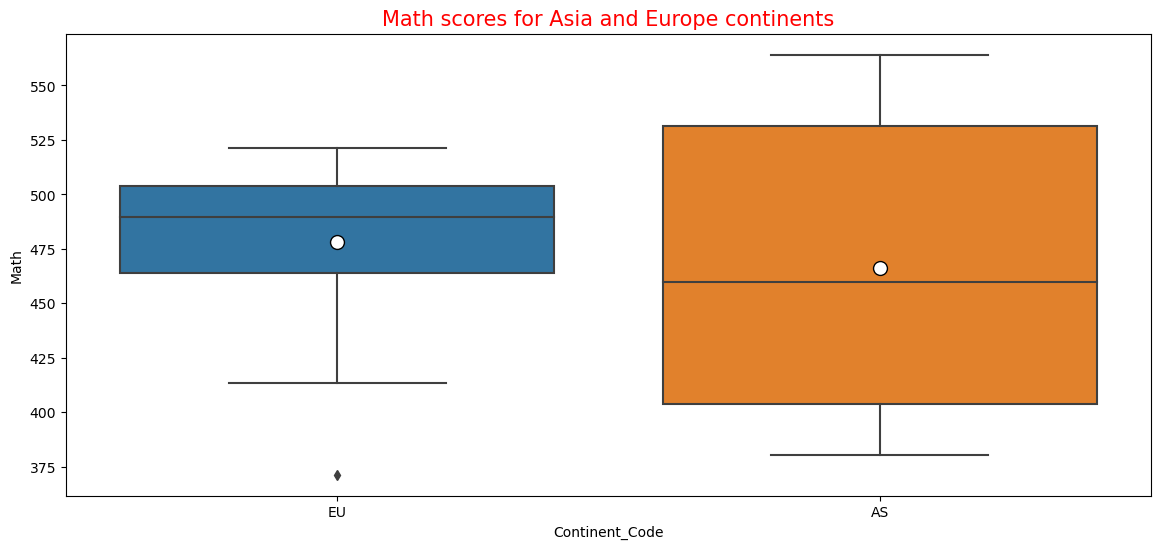

In [41]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.boxplot(y = df_euroasia.Math, x = df_euroasia.Continent_Code, showmeans=True, 
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})

plt.title("Math scores for Asia and Europe continents", fontdict = {"fontsize":15, "color": "red"})

plt.show()